# Radiation Binning

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import math 

plt.rcParams.update({
    "figure.facecolor": (1,1,1,1),
    "axes.facecolor": (1,1,1,1),
    "savefig.facecolor": (1,1,1,1)
})

graph_folder = "RadiationGraphs"

## Preparing Data

In [2]:
rad_df = pd.read_csv(os.path.join("F24Processed", "geiger.csv"))
aprs_df = pd.read_csv(os.path.join("..", "Fall2024Data", "aprsfi_KA7NSR-9_data.csv"))

print(list(rad_df.columns))
print(len(rad_df))
print(list(aprs_df.columns))
print(len(aprs_df))

print(len(aprs_df))
print("Before")
print("aprs\n", aprs_df['time'].head())
print("rad\n", rad_df['Time'].head())

aprs_df['time'] = pd.to_datetime(aprs_df['time'], format='ISO8601') - pd.Timedelta(hours=7)
rad_df['Time'] = pd.to_datetime(rad_df['Time'], format='ISO8601')
print("After")
print("aprs\n", aprs_df['time'].head())
print("rad\n", rad_df['Time'].head())


['Time', 'Timestamp', 'Event', 'Count Rate', ' cps', 'Dose rate', ' Sv/h', 'Dose Rate Error', ' %', 'Dose Rate Alarm', 'Dose Alarm', 'Duration of dose accumulation', ' sec.', 'Dose', ' Sv', 'Temperature', 'Latitude', 'Longitude', 'Comment']
436
['time', 'lasttime', 'lat', 'lng', 'speed', 'course', 'altitude', 'comment']
47
47
Before
aprs
 0    2024-11-23 16:05:26
1    2024-11-23 16:16:26
2    2024-11-23 16:23:26
3    2024-11-23 16:25:26
4    2024-11-23 16:26:56
Name: time, dtype: object
rad
 0    2024-11-22 22:16:20.956
1    2024-11-22 22:16:22.956
2    2024-11-22 22:17:22.956
3    2024-11-22 22:17:23.476
4    2024-11-22 22:17:23.546
Name: Time, dtype: object
After
aprs
 0   2024-11-23 09:05:26
1   2024-11-23 09:16:26
2   2024-11-23 09:23:26
3   2024-11-23 09:25:26
4   2024-11-23 09:26:56
Name: time, dtype: datetime64[ns]
rad
 0   2024-11-22 22:16:20.956
1   2024-11-22 22:16:22.956
2   2024-11-22 22:17:22.956
3   2024-11-22 22:17:23.476
4   2024-11-22 22:17:23.546
Name: Time, dtype: da

## Creating Bins

In [3]:
# bins based on aprs data 

def bin_mean(df):
    col = 'Dose rate'
    if df[col].count() == 0:
        return 0 
    else:
        return  df[col].mean()

def make_bins(bin_function, widths=False):
    bins = {}
    
    for i in range(len(aprs_df) - 1):
        # print(f"Between {aprs_df['time'][i]} and {aprs_df['time'][i+1]}")
        start = aprs_df['time'][i]
        stop = aprs_df['time'][i+1]
        start_alt = aprs_df['altitude'][i] / 1000 # km
        stop_alt = aprs_df['altitude'][i+1] / 1000 # km
        selection_df = rad_df[(rad_df['Time'] >= start) & (rad_df['Time'] < stop)]
    
        label = f"{round(start_alt,2)} to {round(stop_alt,2)}"
        # print(start, stop)
        # print(label)
        # print(selection_df[['Time', 'Dose rate']])
        
        bins[label] = bin_function(selection_df)

    return bins


## Graphing

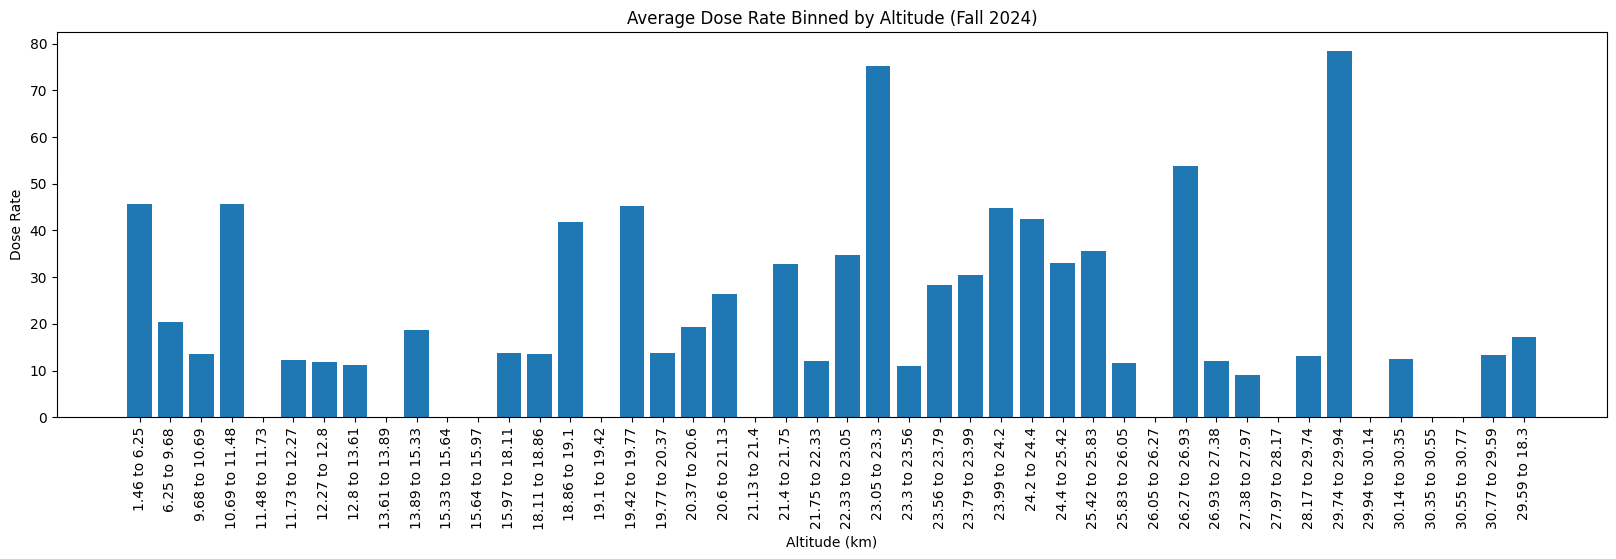

In [4]:

fig, ax = plt.subplots(figsize=(20,5))

bins = make_bins(bin_mean)
ax.bar(x=list(bins.keys()), height=list(bins.values()))
ax.tick_params(axis='x', labelrotation=90)
ax.set_title("Average Dose Rate Binned by Altitude (Fall 2024)")
ax.set_ylabel("Dose Rate")
ax.set_xlabel("Altitude (km)")

plt.show()

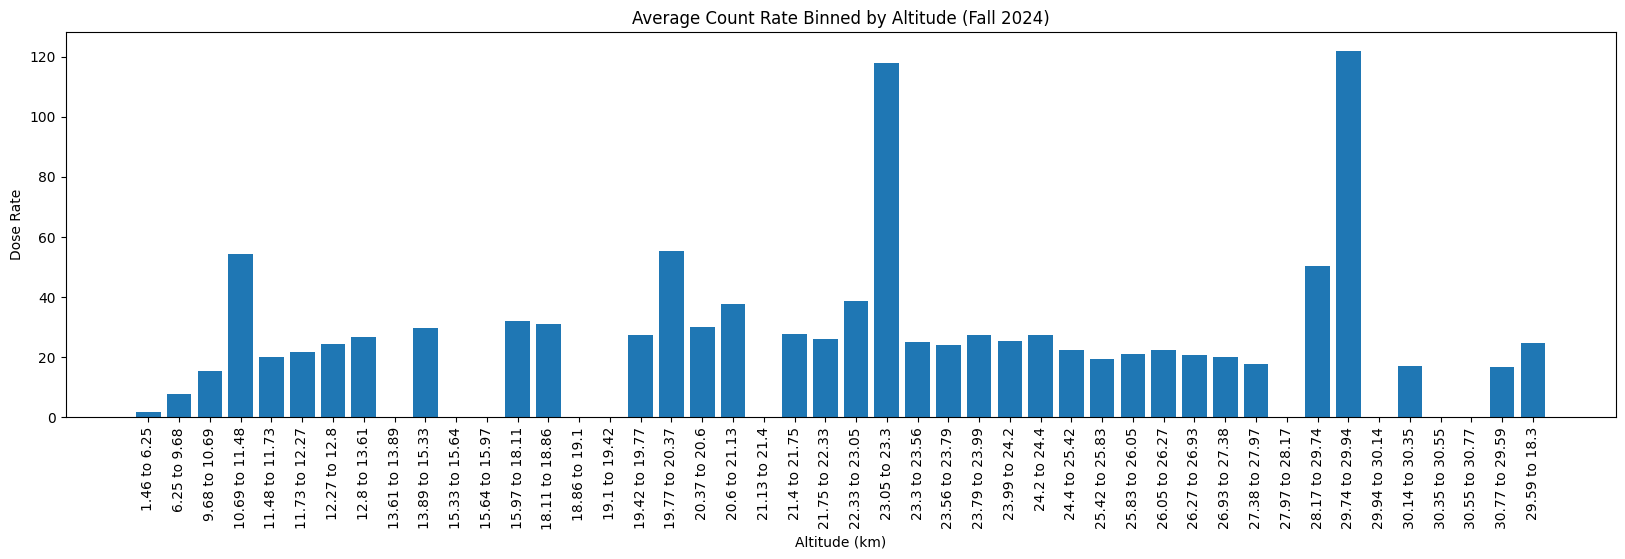

In [5]:

def bin_mean_count_rate(df):
    col = 'Count Rate'
    if df[col].count() == 0:
        return 0 
    else:
        return  df[col].mean()

fig, ax = plt.subplots(figsize=(20,5))

bins = make_bins(bin_mean_count_rate)
ax.bar(x=list(bins.keys()), height=list(bins.values()))
ax.tick_params(axis='x', labelrotation=90)
ax.set_title("Average Count Rate Binned by Altitude (Fall 2024)")
ax.set_ylabel("Dose Rate")
ax.set_xlabel("Altitude (km)")

plt.show()

In [6]:
def bin_mean(df):
    col = 'Dose rate'
    if df[col].count() == 0:
        return 0 
    else:
        return  df[col].mean()

def make_bin_lists(bin_function = bin_mean):
    labels = []
    bins = []
    widths = []
    centers = []
    
    for i in range(len(aprs_df) - 1):
        # print(f"Between {aprs_df['time'][i]} and {aprs_df['time'][i+1]}")
        start = aprs_df['time'][i]
        stop = aprs_df['time'][i+1]
        start_alt = aprs_df['altitude'][i] / 1000 # km
        stop_alt = aprs_df['altitude'][i+1] / 1000 # km
        selection_df = rad_df[(rad_df['Time'] >= start) & (rad_df['Time'] < stop)]
    
        label = f"{round(start_alt,2)} to {round(stop_alt,2)}"
        # print(start, stop)
        # print(label)
        # print(selection_df[['Time', 'Dose rate']])

        if stop_alt - start_alt < 0:
            break
        
        labels.append(label)
        bins.append(bin_function(selection_df))
        centers.append((start_alt + stop_alt) / 2)
        widths.append(stop_alt - start_alt) 

    return labels, bins, centers, widths 


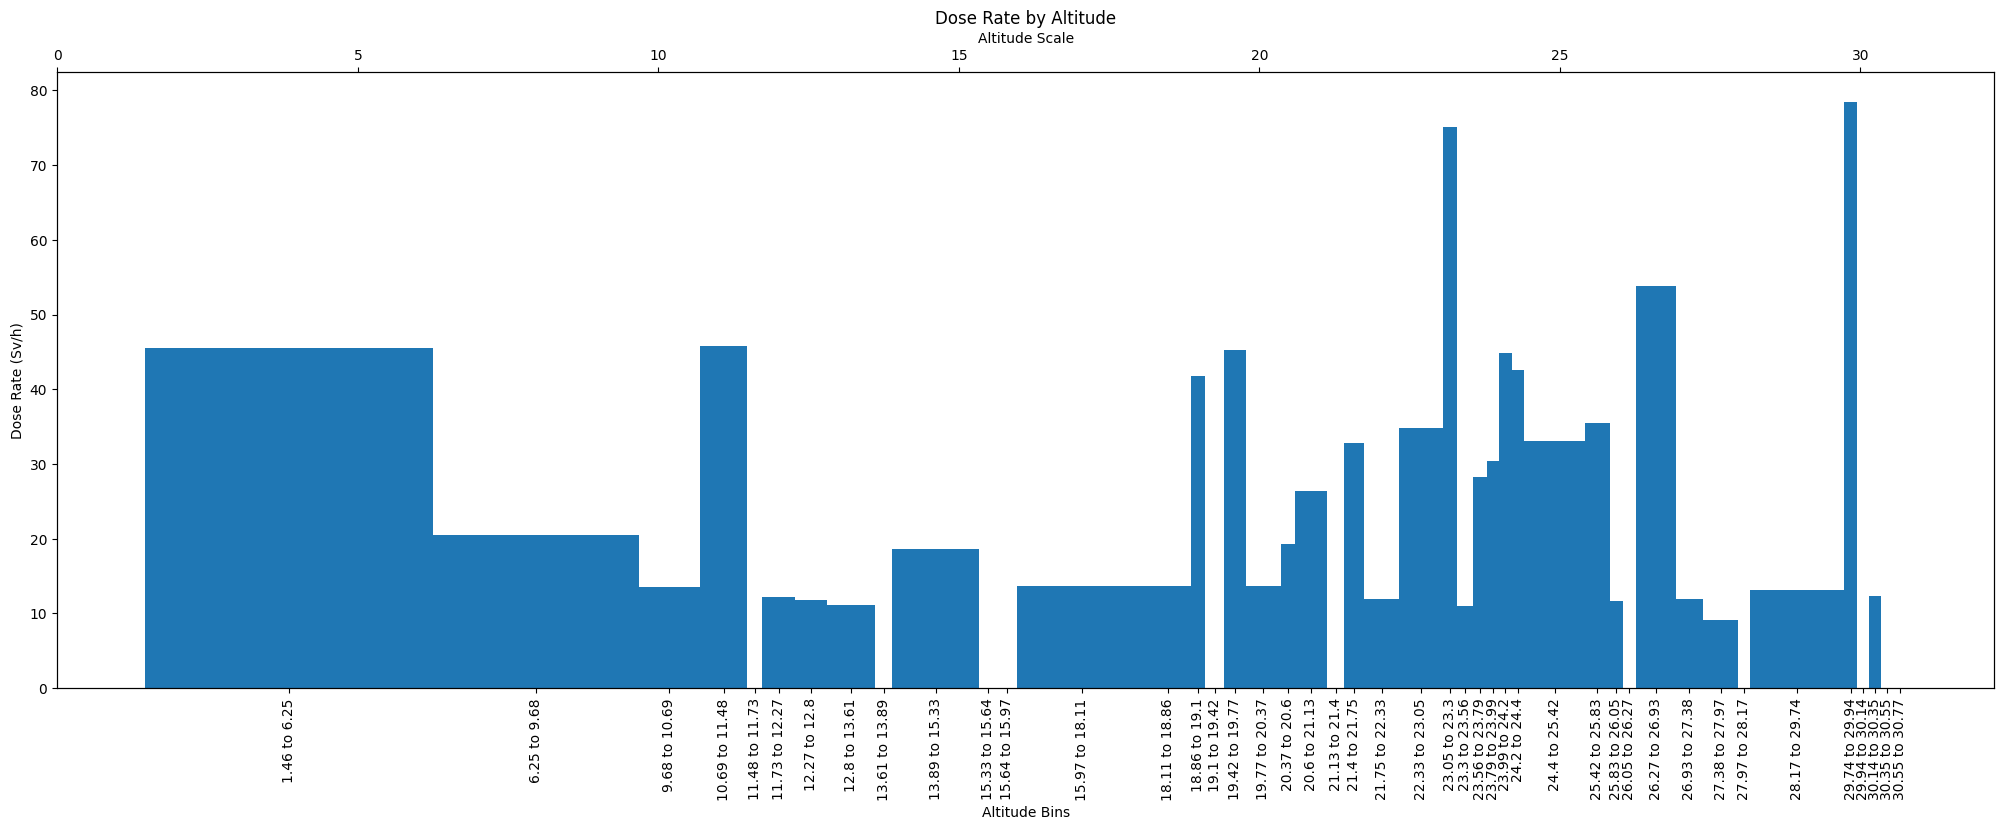

In [10]:

fig, ax = plt.subplots(figsize=(25,8))

labels, bins, centers, widths = make_bin_lists()

ax.bar(x=centers, height=bins, width=widths)

ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xlabel("Altitude Scale")

ax.set_ylabel("Dose Rate (Sv/h)")
ax.set_xticks(centers)
ax.set_xticklabels(labels)
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel("Altitude Bins")

ax.set_title("Dose Rate by Altitude")

plt.savefig(os.path.join(graph_folder, f"doserate_altitude.svg"))
plt.savefig(os.path.join(graph_folder, f"doserate_altitude.png"), dpi=300)

plt.show()



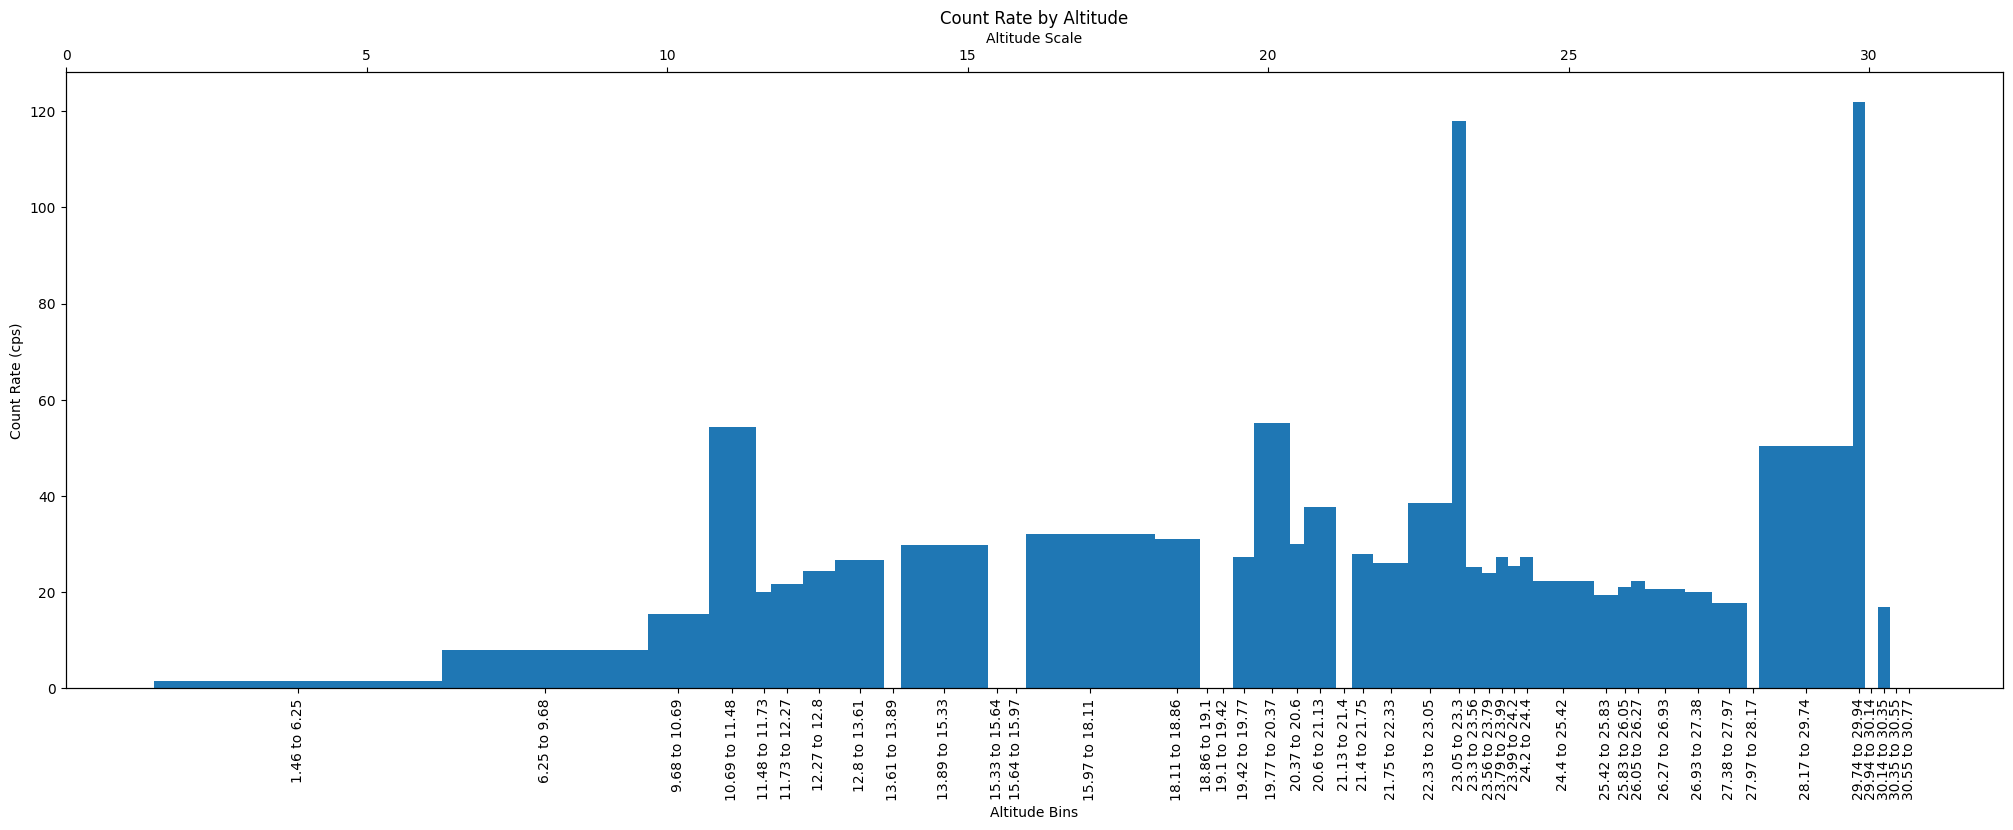

In [11]:

def bin_mean_count_rate(df):
    col = 'Count Rate'
    if df[col].count() == 0:
        return 0 
    else:
        return  df[col].mean()

fig, ax = plt.subplots(figsize=(25,8))

labels, bins, centers, widths = make_bin_lists(bin_function=bin_mean_count_rate)

ax.bar(x=centers, height=bins, width=widths)

ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xlabel("Altitude Scale")

ax.set_ylabel("Count Rate (cps)")
ax.set_xticks(centers)
ax.set_xticklabels(labels)
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel("Altitude Bins")

ax.set_title("Count Rate by Altitude")

plt.savefig(os.path.join(graph_folder, f"countrate_altitude.svg"))
plt.savefig(os.path.join(graph_folder, f"countrate_altitude.png"), dpi=300)

plt.show()
